# Histogram
I denna notebook introducerar vi enklare verktyg för att plotta histogram med Python.

Från tidigare mätdata på periodtider för belastade fjädrar kan vi bestämma fjäderkonstanten $k$. Dessa mätdata fungerar som basen för vår statistiska analys.

### Format på mätdata
För all datainsamling och mätvärdesbehandling är val av dataformat en viktig parameter. Här har vi valt att sammanställa alla mätningar i en CSV-fil, d.v.s. en textfil med alla värden separerade med ett skiljetecken. I ursprungsdefinitionen av CSV-formatet används kommatecken, därav namnet "comma separated values", CSV. Kommatecken används dock som decimaltecken i många språk, inklusive svenska så ofta används semikolon eller tab som avskiljare i CSV-filer. 

Den data som används här har exporterats från ett gemensamt kalkylblad och innehåller alla mätningar från tidigare mättillfälle enligt följande format: 

``` Massa; Periodtid; Grupp; Perioder ```

Där `Massa` är massan i gram, `Periodtid` den uppmätta periodtiden medans `Grupp` betecknar vilken studentgrupp som utförde mätningen och `Perioder` ger antalet perioder som periodtiden medelvärdesbildades över.

CSV-filen som används här finns lagrad i länken nedan.

In [1]:
dataurl='https://raw.githubusercontent.com/anbergman/expmet/4ac91f4203a77a7754e73929a1f4757ef7ae454b/Fjadermatningar.csv'

***
### Initialisering
Först laddar vi in de bibliotek som ska användas. Nedan ges exempel på flera sätt som histogram kan ritas upp. För att kunna använda dem alla behöver vi importera `numpy` för grundläggande matematiska operationer, `matplotlib` för plottning, `pandas` för en alternativ hantering av data och `seaborn` för ytterligare statistiska plottar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Figursättning
För läsbara figurer behöver ofta egenskaperna för `matplotlib` ändras på detaljnivå. Ett vanligt problem är att fontstorlek inte skalar med figurstorlek vilket gör att legender och axlar blir svåra att utläsa när figurer skapas i en hög upplösning för att sedan infogas i ett dokument med mindre skala. Därför är det en bra vana att alltid ha några rader som nedan där grundinställningar snabbt kan ändras för alla figurer. 

In [3]:
# Import resource control for matplotlib
from matplotlib import rc

# Define general font properties
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 18}

# Define default figure size
figure = {'figsize' : [12,6] }

# Apply the font and figure properties as default (for this session)
rc('font', **font) 
rc('figure', **figure) 

***
# Variant 1: Numpy + matplotlib
Det finns många sätt att beräkna och plotta histogram i Python. Vilket alternativ som är bäst beror ofta på vilken balans mellan användarvänlighet och kontroll som önskas. Här går vi först igenom hur `numpy` kan användas för att läsa in och processa mätdatan. Fördelen med `numpy` är att biblioteket har gott om grundläggande funktionaliteter och är relativt intuitivt att använda. Tyvärr kan matrishantering i `numpy` dock ofta uppfattas som klumpigt. 

### Inläsning
Först läses all mätdata in enligt formatet ovan. Här anges att semikolon används som avskiljare och att den första raden i filen hoppas över då den innehåller rubriker för kolumnerna och inte mätdata. Resultatet blir en tvådimensionell array `indata`.

In [4]:
# Read CSV file for all T measurements
indata=np.genfromtxt(dataurl,delimiter=';',skip_header=1)

### Beräkning
Därefter beräknas fjäderkonstanten $k$ från de inlästa periodtiderna och massorna. Här används formeln 
\begin{align}
 k&=\frac{4\pi^2 m}{T^2} \\
\end{align}

Vi extraherar även varje kolumn i matrisen `indata` för att tydligöra vad de innehåller. De beräknade fjäderkonstanterna sparas i vektorn `spring_constant`.

In [5]:
# Mass
massa=indata[:,0]/1000.0
# Period
periodtid=indata[:,1]
# Student group
grupp=indata[:,2]
# Number of periods for average (1=T, 10=Tau)
perioder=indata[:,3]

# Auxilliary logical array which is True if the measurement is of Tau and False if it is for T.
tau=perioder==10

# Resulting spring constant
spring_constant=4.0*np.pi**2*massa/periodtid**2

### Tau eller T
För att enklare skilja på mätningarna av $k$ från enstaka periodtider $T$ eller medelvärdesbildade periodtider $\tau$ skapar vi två separata vektorer `k_T` för $k_T$ och `k_\tau` för $k_\tau$.

In [6]:
# Extract k_tau and k_T based from a boolean mask with the auxilliary logical array tau.
k_T=spring_constant[tau==False]
k_Tau=spring_constant[tau==True]

### Visualisering av mätdatan : Serie
För att få en första överblick av den uppmätta fjäderkonstanten $k$ plottas serierna av $k_T$ och $k_\tau$ i samma figur. Notera att här ges x-axeln av mätningsindex så informationen i figuren är svåranalyserad.

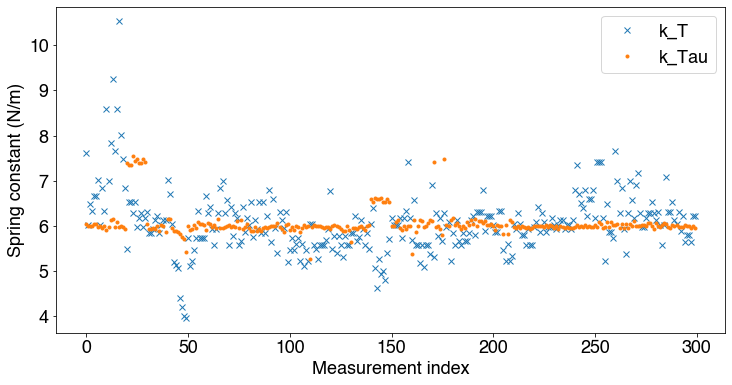

In [7]:
# Plot the time series of k_T 
plt.figure()
plt.plot(k_T,'x',label='k_T')
plt.plot(k_Tau,'.',label='k_Tau')

# Give a legend
plt.legend()

# Define the y-axis
plt.ylabel('Spring constant (N/m)')

# Define the x-axis
plt.xlabel('Measurement index')
plt.show()

***
### Visualisering av mätdatan : Histogram I
Nu kan vi börja titta på histogram för fjäderkonstanten $k$. Vi skiljer fortsatt mellan serierna av $k_T$ och $k_\tau$ och plottar dem här i oliga figurer. 

#### pyplot.hist()
Först använder vi matplotlib.pyplots inbyggda histogramfunktion `hist()`. Funktionen anropas med den vektor som histogrammet ska skapas för. Med diverse nyckelord (keywords) kan man kontrollera histogrammets egenskaper. 

Se mer på [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

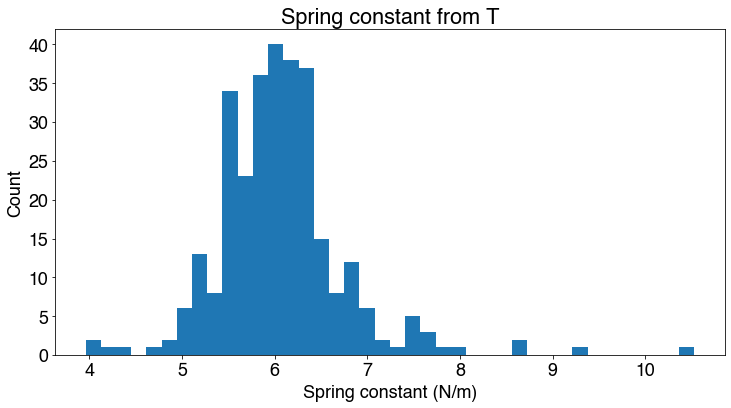

In [8]:
# Initialize figure
plt.figure()

# Plot histogram using matplotlibs hist() function. 
plt.hist(k_T,bins=40)

# Customize figure using standard matplotlib commands
plt.title('Spring constant from T')
plt.xlabel('Spring constant (N/m)')
plt.ylabel('Count')

# Show figure
plt.show()


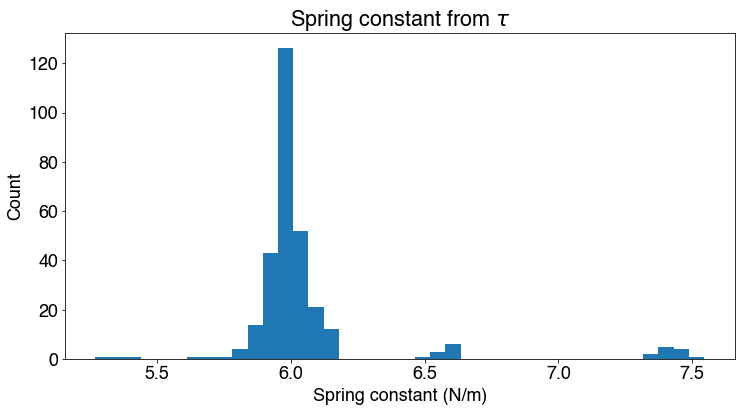

In [9]:
# Initialize figure
plt.figure()

# Plot histogram using matplotlibs hist() function. 
plt.hist(k_Tau,bins=40)

# Customize figure using standard matplotlib commands 
#(notice the 'r' in the title for LaTeX support)
plt.title(r'Spring constant from $\tau$')
plt.xlabel('Spring constant (N/m)')
plt.ylabel('Count')

# Show figure
plt.show()


### Övning:
Diskutera skillnaderna mellan histogrammen för $k_T$ och $k_\tau$.

### Övning:
Variera antalet intervall i histogrammen ovan och analysera utseendet på de resulterande histogrammen.

Metoden `pyplot.hist()` som visats ovan lämpar sig bra för enkla figurer och med keywords kan man få en skaplig kontroll över hur figuren ska visas. Till exempel kan man med `density=True` få rita upp sannolikhetstäthetsfunktionen istället för det rena histogrammet. Dock är det ibland mer önskvärt med mer kontroll och det kan fås med `numpy.histogram()` som beskrivs nedan.


***
#### numpy.histogram()
Använder man numpys histogramfunktion `numpy.histogram()` beräknas histogrammet istället för att plottas. Resultatet som funktionen returnerar kan därför efterbehandlas och ritas upp på egen hand.
Den grundläggande syntaxen är: 

```hist, bin_edges = np.histogram(data,kwargs)```

där `hist` innehåller antal träffar i varje intervall och `bin_edges` kanterna för intervallen. `kwargs` används för att kontrollera hur histogrammet skapas. Även här kan man ange antal intervall med `bins` och beräkna sannolikhetstäthetsfunktionen med `density=True`.

Se mer på [https://numpy.org/doc/stable/reference/generated/numpy.histogram.html](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

In [10]:
# Set number of bins
nbins=40

# Calculate the histogram for nbins 
hist, bin_edges = np.histogram(k_Tau, density=False, bins=nbins)

# Calculate the histogram for nbins 
hist_T, bin_edges_T = np.histogram(k_T, density=False, bins=nbins)


# Extract the bin width
bin_width = bin_edges[1]-bin_edges[0]
bin_width_T = bin_edges_T[1]-bin_edges_T[0]

Det beräknade histogrammet kan sedan plottas t.ex. som ett stapeldiagram med `pyplot.bar`.

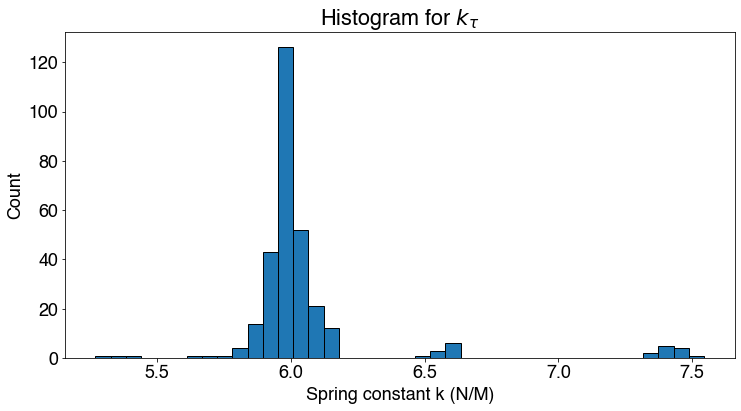

In [11]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges[:-1],hist,bin_width,align='edge',edgecolor='Black')

# Define axes and labels
plt.title(r'Histogram for $k_\tau$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')

# Show the figure
plt.show()

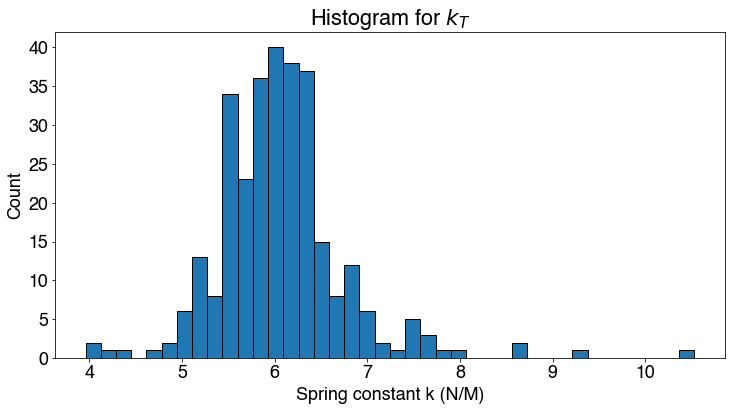

In [12]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges_T[:-1],hist_T,bin_width_T,align='edge',edgecolor='Black')

# Define axes and labels
plt.title(r'Histogram for $k_T$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')

# Show the figure
plt.show()

Nedan visas hur den utökade kontrollen med `numpy.histogram()` kan användas för att variera figurernas utseende. Här plottas histogrammen för $k_T$ och $k_\tau$ i samma figur med olika färg och genomskinlighet.


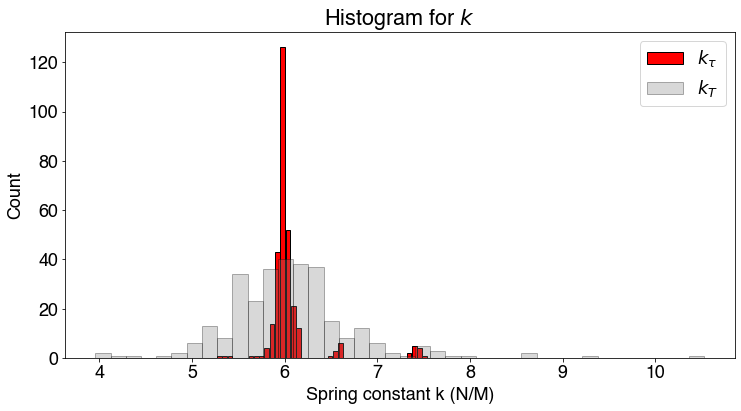

In [13]:
# Initialize figure
plt.figure()

# Plot bar diagram with thinner bins, colored faces and black edge colors.
plt.bar(bin_edges[:-1],hist,bin_width*0.9,align='edge',color='Red',edgecolor='Black',label=r'$k_\tau$')
plt.bar(bin_edges_T[:-1],hist_T,bin_width_T,align='edge',color='Gray',edgecolor='Black',alpha=0.3,label=r'$k_T$')


# Define axes and labels
plt.title(r'Histogram for $k$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')
plt.legend()

# Show the figure
plt.show()

### Övning:
Ändra cellerna ovan så att sannolikhetsfördelningsfunktionen plottas istället för histogrammet.

#### Notera: Intervallgränser och mittpunkter
En vanlig orsak till fel vid uppritande av histogram som stapeldiagram är att placera staplarna på rätt plats. Det visas i exemplet nedan där `align=center` används istället för `align=edge`.

Vilket sätt är rätt?

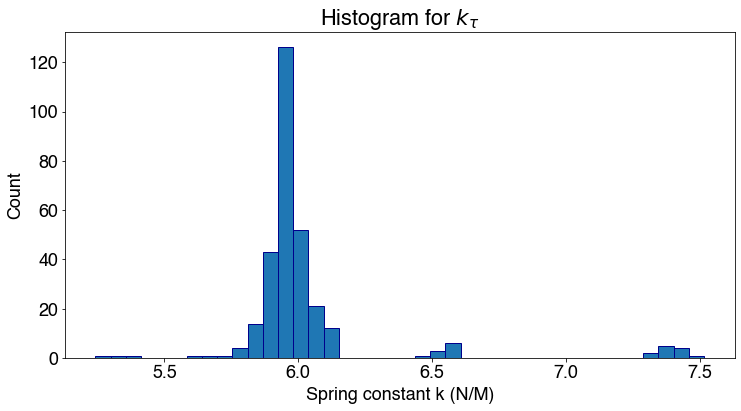

In [14]:
# Initialize figure
plt.figure()

# Plot bar diagram (note the align keyword)
plt.bar(bin_edges[:-1],hist,bin_width,align='center',edgecolor='Darkblue')

# Define axes and labels
plt.title(r'Histogram for $k_\tau$')
plt.xlabel('Spring constant k (N/M)')
plt.ylabel('Count')

# Show the figure
plt.show()

***

***
# Variant 2: Pandas + Seaborn
En lite mer sofistikerad variant för histogram och annan statistisk analys kan fås med kombinationen `pandas` som hanterar tidserier och andra datastrukturer och `seaborn` som är ett paket specialicerat på visualisering av statistikdata. Tröskeln för att använda `pandas` kan ses som något högre än för `numpy`, men för etablerade arbetsflöden kan det vara värt mödan.

### Inläsning
Först läses all mätdata in enligt formatet som definierats tidigare. Här anges att semikolon används som avskiljare. Eftersom vi nu läser in en `DataFrame` vill vi använda de rubriker som finns i CSV-filen och läser in med pandas inbyggda funktion `pandas.read_csv()'.

In [15]:
measurements=pd.read_csv('./Fjadermatningar.csv',delimiter=';')

### Dataframe-formatet
`pandas` bygger på `numpy` så egentligen lagras datan på ett liknande sätt, men i `pandas` kan varje kolumn (och rad) få en definierad etikett som inte bara kan underlätta utskrift (se nedan) utan även indexering.

In [16]:
# Print the first ten measurements to showcase the column headers
measurements[0:9]

,Massa,Periodtid,Grupp,Perioder
0,100,0.72,1,1
1,100,0.81,1,1
2,100,0.78,1,1
3,100,0.79,1,1
4,100,0.77,1,1
5,100,0.77,1,1
6,100,0.75,1,1
7,100,0.81,1,1
8,100,0.76,1,1


### Beräkning
Precis som när `numpy` användes ovan behöver fjäderkonstanterna beräknas från massorna och periodtiderna. Här skulle vi kunna återanvända tidigare data genom att ta vektorn `spring_constant` från tidigare och lägga till den som en kolumn i vår dataframe. 

Men för att visa hur man kan indexera och räkna med kolumnerna i dataframen gör vi om beräkningen på panda-vis. 

In [17]:
# Calculate a new column containing the sprin constant from the masses and periods
measurements['Fjäderkonstant']=4.0*np.pi**2*measurements['Massa']/measurements['Periodtid']**2/1000.0

#### Notera:
För indexering i pandas kan man antingen använda `measurements['Massa']` eller `measurements.Massa`. I denna notebook håller vi oss till den förstnämnda konventionen.


### Visualisering
Med fjäderkonstanterna beräknade kan vi extrahera vektorn med fjäderkonstanterna som en numpy-array och använda rutinerna som visats ovan för att göra ett histogram. Men pandas dataframes har inbyggda histogramrutiner som kan användas enligt nedan.

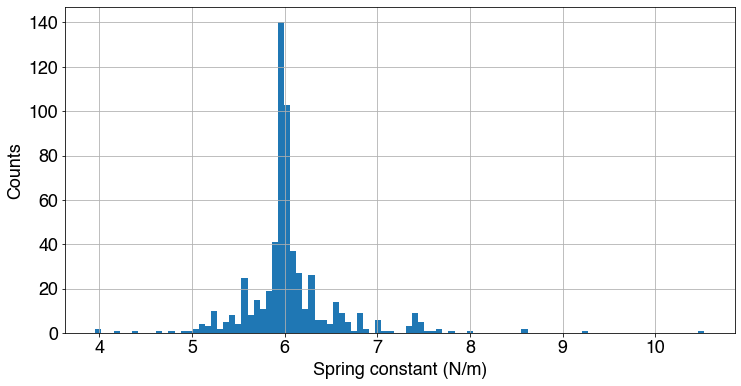

In [18]:
# Initialize figure
plt.figure()

# Plot histogram using pandas built-in function hist (based on numpy/matplotlib)
measurements['Fjäderkonstant'].hist(bins=100)

# Define labels
plt.xlabel("Spring constant (N/m)")
plt.ylabel("Counts")


plt.show()

I figuren ovanför skapades histogrammet av alla mätvärden, d.v.s. från både $T$ och $\tau$. För att välja den ena eller andra kan man filtrera dataframen på liknande sätt som i exemplet nedan.

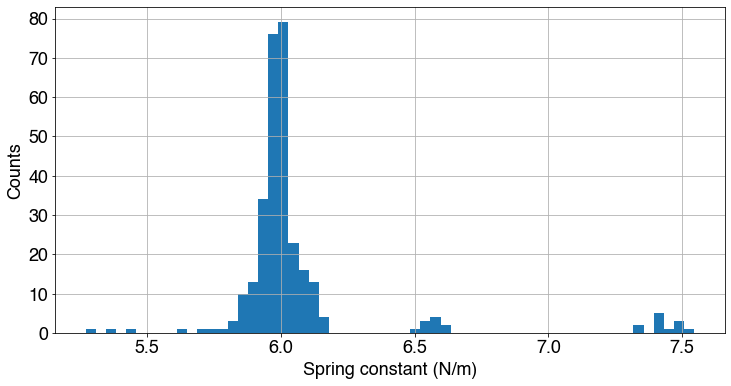

In [19]:
# Initialize figure
plt.figure()

# Plot histogram using pandas built-in function hist (based on numpy/matplotlib)
# Here we extract only the tau-values
measurements['Fjäderkonstant'][measurements['Perioder']==10].hist(bins=60)

# Define labels
plt.xlabel("Spring constant (N/m)")
plt.ylabel("Counts")

# Show figure
plt.show()

***
### Visualisering med Seaborn
Seaborn har funktionen `histplot()` för att rita histogram och `displot()` för sannolikhetsfördelningsfunktioner. Utseendet för figurerna kan enkelt ändras mellan ett antal olika stilar (`seaborn.set_style()`) som exemplen nedan.

Det finns olika inbyggda stil-kommandon även för matplotlib, t.ex. `plt.xkcd()`. 

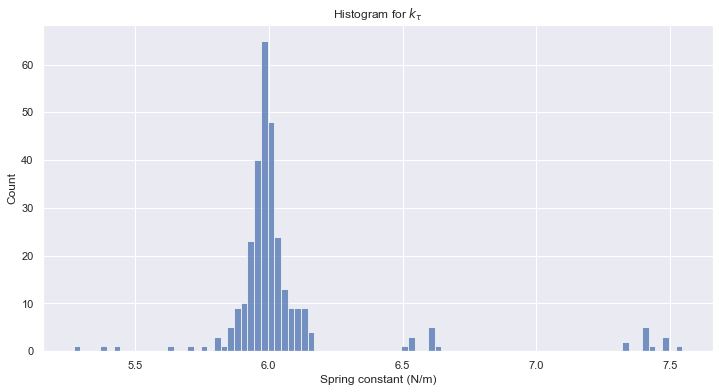

In [20]:
# Set seaborn theme (only needed once)
sns.set_theme()

# Plot seaborn histogram for tau
sns.histplot(measurements['Fjäderkonstant'][measurements['Perioder']==10])

# Define labels
plt.xlabel("Spring constant (N/m)")
plt.title(r"Histogram for $k_\tau$")

# Show figure
plt.show()

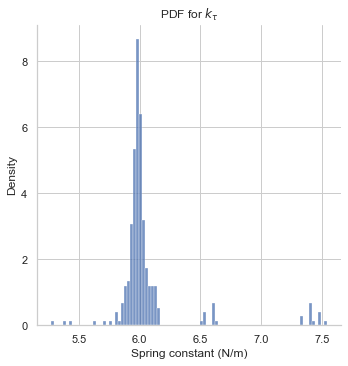

In [21]:
# Set seaborn style
sns.set_style("whitegrid")

# Plot seaborn PDF for tau
sns.displot(measurements['Fjäderkonstant'][measurements['Perioder']==10], stat = 'density')

# Set labels
plt.title(r'PDF for $k_\tau$')
plt.xlabel("Spring constant (N/m)")

# Show figure
plt.show()

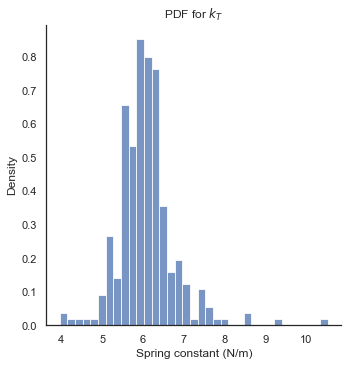

In [22]:
# Set seaborn style
sns.set_style("white")

# Plot seaborn PDF for T
sns.displot(measurements['Fjäderkonstant'][measurements.Perioder==1], stat = 'density')

# Set labels
plt.title(r'PDF for $k_T$')
plt.xlabel("Spring constant (N/m)")

# Show figure
plt.show()

Som synes ovan så följer `seaborn` inte alltid konventioner och standardvärden från `matplotlib`. Figur- och fortstorlekarna är här annorlunda men kan sättas manuellt.

### Gruppjämförelse
Som ett sista exempel på histogramplottning visar vi nedan två grafer där sannolikhetsfördelningsfunktionerna för $k_\tau$ visas uppdelat per grupp. Med den uppdelningen kanske statistiken blir i minsta laget men det kan ändå vara intressant att diskutera hur de olika gruppernas mätvärden skiljer sig åt, trots identisk (och numerisk) experimentuppställning.


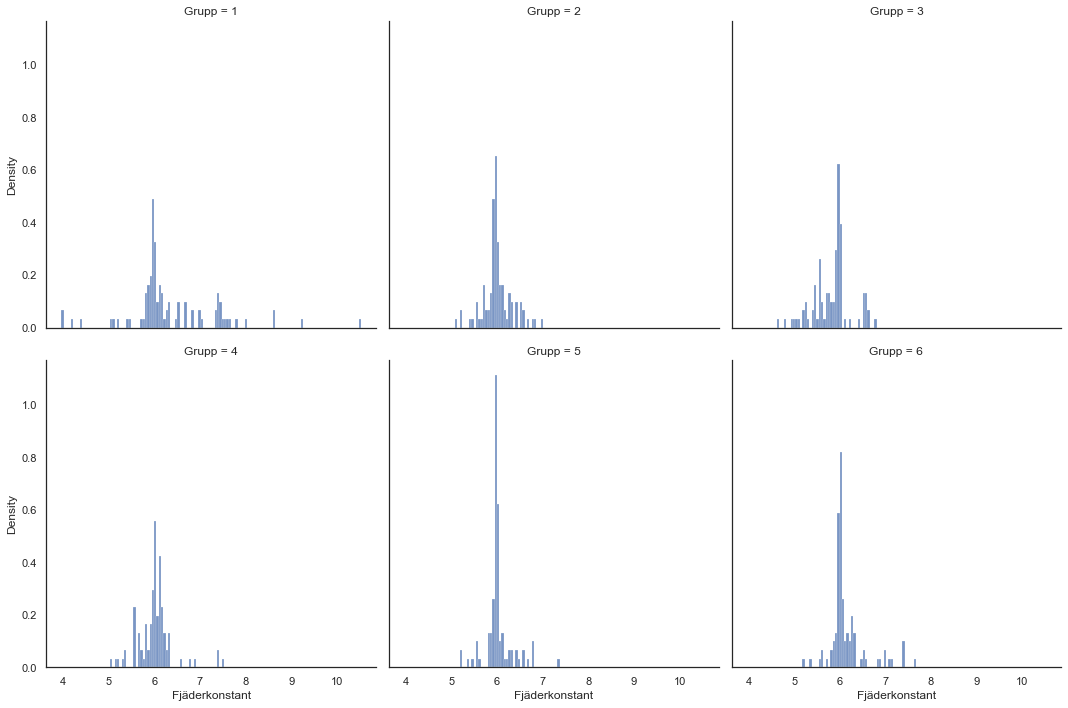

In [23]:
# Plot seaborn PDF for Tau per group
sns.displot(data=measurements, x="Fjäderkonstant", col="Grupp", multiple="stack",col_wrap=3, stat='density')

# Show figure
plt.show()

Seaborn kan även anpassa histogram till fördelningsfunktioner. Det görs med keywordet `kind=kde`. Det kan vara användbart som visualiseringsmetod men eftersom det inte är uppenbart hur anpassningen sker är det inte rekommenderat att använda den funktionen som grund för sin fortsatta analys.

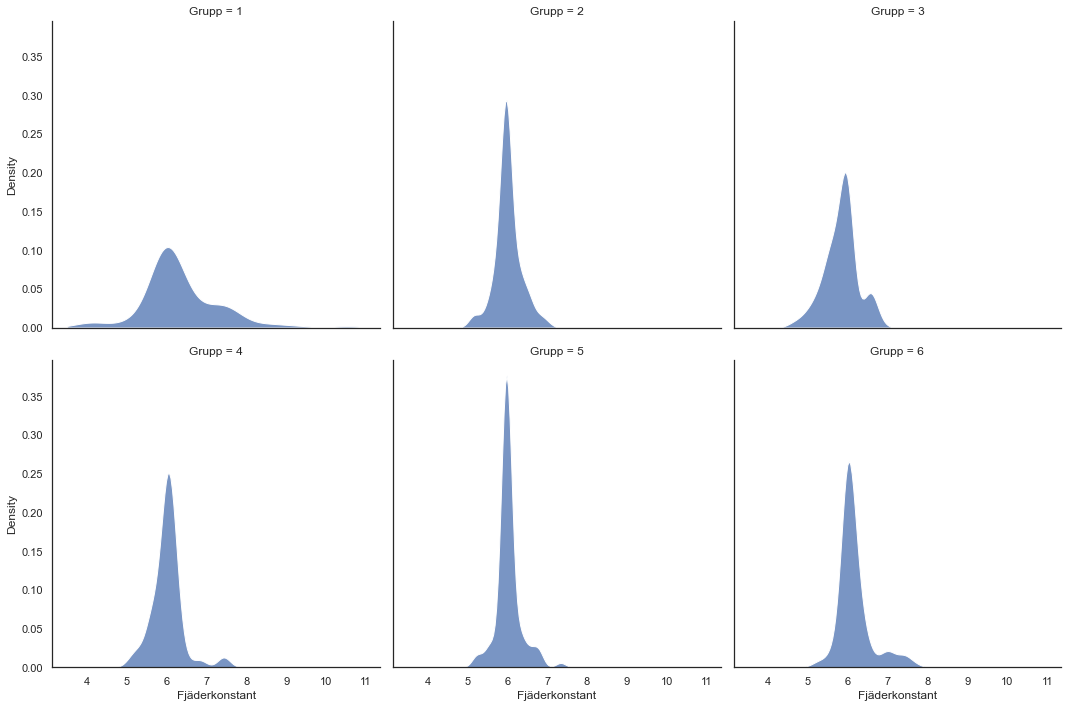

In [24]:
# Plot seaborn PDF for Tau per group
sns.displot(data=measurements, x="Fjäderkonstant", col="Grupp", multiple="stack",kind='kde',col_wrap=3)

# Show figure
plt.show()

***